# Logistic regression model built on scikit-learn

## Note: all the articles were published from 2000 to 2021, and all of them have abstracts in the database

1.Build a new classifier

    Positive dataset: articles with MeSH term "Heart Transplantation" and qualifier "Mortality"
    
    Negative dataset: articles with MeSH term "Heart Transplantation" and without qualifier "Mortality"

    Training dataset: 1000*2 articles, Validation dataset: 500*2 articles, Test dataset: 246 positive; 13707 negative
    
2.Perform classifier to all the articles with MeSH term "Heart Transplantation" and without qualifier "Mortality" to see if there are some of them classified as positive

3.Perform classifier to the articles that have the qualifier "Mortality" to see if they are properly detected as positive

### Construct the model with scikit-learn

In [1]:
## Load all the 1000*2 training dataset scraped
from sklearn.datasets import load_files

PATH = 'training dataset'
DESCR = 'positive negative dataset'
categories = ['positive', 'negative']
train_data = load_files(container_path=PATH, description=DESCR, shuffle=True, random_state = 40)
for i in range(len(train_data.data)):
    train_data.data[i] = str(train_data.data[i])
    train_data.data[i] = train_data.data[i].replace(train_data.data[i][0:2], "")
    train_data.data[i] = train_data.data[i].replace(train_data.data[i][-1], "")

In [2]:
## Construct the popeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])
text_clf.fit(train_data.data, train_data.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

### Training dataset

In [3]:
## Validate the model with 500*2 test dataset scraped
import numpy as np
PATH = 'validation dataset'
predicted = text_clf.predict(train_data.data)
score = np.mean(predicted == train_data.target)
print("Accuracy: ",score)

Accuracy:  0.9255


In [4]:
## Evaluate the model
from sklearn import metrics
# predicted_train = text_clf.predict(train_data.data)
f1 = metrics.f1_score(train_data.target, predicted, average='macro')
print(metrics.classification_report(train_data.target, predicted,
target_names=train_data.target_names))
print("Macro-F1 score: {0}".format(f1))

              precision    recall  f1-score   support

    negative       0.92      0.93      0.93      1000
    positive       0.93      0.92      0.92      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Macro-F1 score: 0.9254958091392641


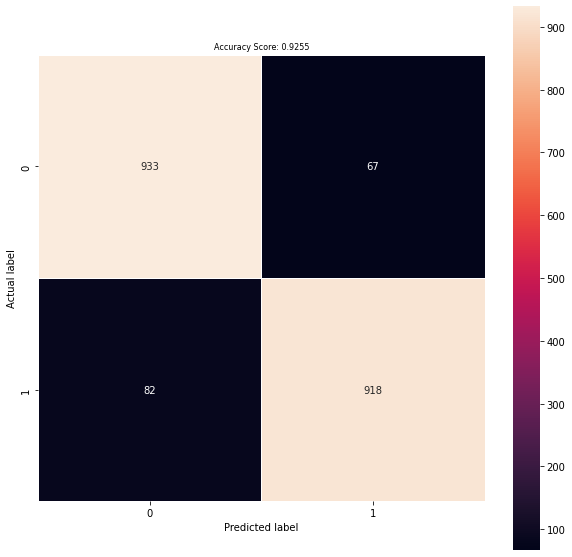

In [5]:
## Evaluate the model
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(train_data.target, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 8);

### Validation dataset

In [6]:
## Validate the model with 500*2 test dataset scraped
import numpy as np
PATH = 'validation dataset'
val_data = load_files(container_path=PATH, description=DESCR, shuffle=True, random_state = 40)
for i in range(len(val_data.data)):
    val_data.data[i] = str(val_data.data[i])
    val_data.data[i] = val_data.data[i].replace(val_data.data[i][0:2], "")
    val_data.data[i] = val_data.data[i].replace(val_data.data[i][-1], "")
predicted = text_clf.predict(val_data.data)
score = np.mean(predicted == val_data.target)
print("Accuracy: ",score)

Accuracy:  0.894


In [7]:
## Evaluate the model
from sklearn import metrics
# predicted_train = text_clf.predict(train_data.data)
f1 = metrics.f1_score(val_data.target, predicted, average='macro')
print(metrics.classification_report(val_data.target, predicted,
target_names=val_data.target_names))
print("Macro-F1 score: {0}".format(f1))

              precision    recall  f1-score   support

    negative       0.93      0.85      0.89       500
    positive       0.86      0.93      0.90       500

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.89      0.89      1000

Macro-F1 score: 0.8938301282051282


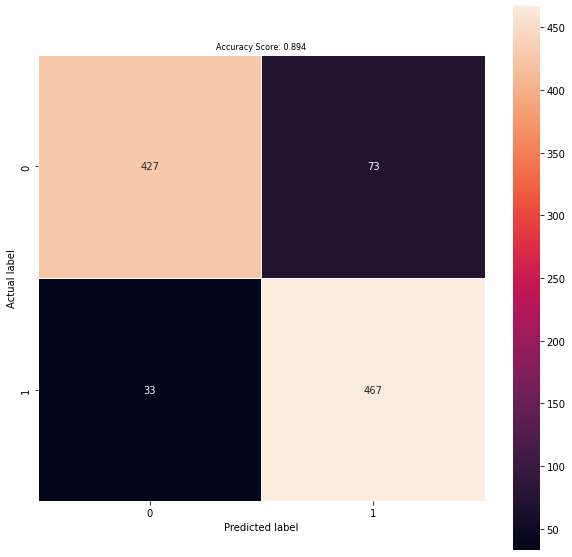

In [8]:
## Evaluate the model
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(val_data.target, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 8);

### Test dataset

In [7]:
## Load all the 1000*2 training dataset scraped
from sklearn.datasets import load_files

PATH = 'test-246 dataset'
DESCR = 'positive negative dataset'
categories = ['positive', 'negative']
test_data = load_files(container_path=PATH, description=DESCR, shuffle=True, random_state = 40)
for i in range(len(test_data.data)):
    test_data.data[i] = str(test_data.data[i])
    test_data.data[i] = test_data.data[i].replace(test_data.data[i][0:2], "")
    test_data.data[i] = test_data.data[i].replace(test_data.data[i][-1], "")

In [9]:
import numpy as np
predicted = text_clf.predict(test_data.data)
score = np.mean(predicted == test_data.target)
print("Accuracy: ",score)

Accuracy:  0.741869918699187


In [10]:
## Evaluate the model
from sklearn import metrics
# predicted_train = text_clf.predict(train_data.data)
f1 = metrics.f1_score(test_data.target, predicted, average='macro')
print(metrics.classification_report(test_data.target, predicted,
target_names=test_data.target_names))
print("Macro-F1 score: {0}".format(f1))

              precision    recall  f1-score   support

    negative       0.90      0.54      0.68       246
    positive       0.67      0.94      0.79       246

    accuracy                           0.74       492
   macro avg       0.79      0.74      0.73       492
weighted avg       0.79      0.74      0.73       492

Macro-F1 score: 0.7309773833972695


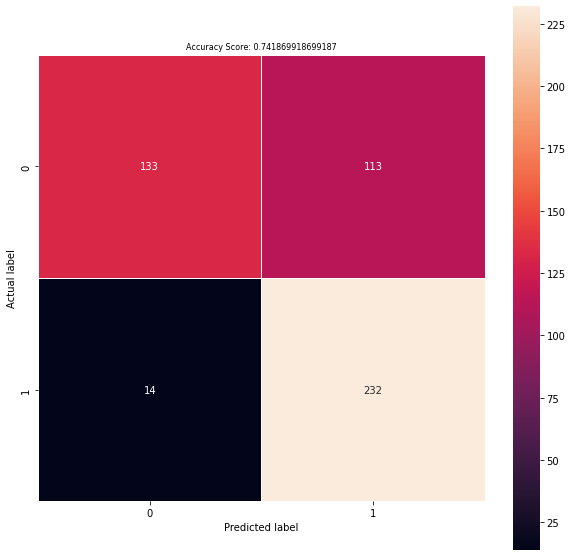

In [11]:
## Evaluate the model
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(test_data.target, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 8);

### 100 articles evaluation

extract articles

In [19]:
import random
import sqlite3
import ast
import copy
import os

In [20]:
neg_list = []
neg_dict = {}
path = 'test dataset/negative'
files= os.listdir(path)
for i in range(50):
    position = random.choice(files[10000:])
    files.remove(position) # avoid replicated ones
    neg_dict[position[:-4]] = 0
neg_list = list(neg_dict.keys())

In [77]:
## Extract the 50 articles from positive test dataset
pos_list = []
pos_dict = {}
path = 'test dataset/positive'
files= os.listdir(path)
for i in range(50):
    position = random.choice(files)
    files.remove(position)
    pos_dict[position[:-4]] = 1
pos_list = list(pos_dict.keys())

In [78]:
all_dict = copy.deepcopy(pos_dict)
all_dict.update(neg_dict)
all_list = pos_list + neg_list

In [79]:
conn = sqlite3.connect('D:\\PubMed_Sqlite3\\pubmed.db')
cu = conn.cursor()
all_text = {}
statement = "SELECT * from articles  WHERE pmid in ({0})".format(', '.join(['?'] * len(all_list)))
article = cu.execute(statement, all_list)
for row in article:
    s = ""
    pmid = row[0]
    abstact = row[2]
    abstract_dic = ast.literal_eval(abstact)
    
    for subt in abstract_dic:
        s1 = subt["Text"]
        if s1 == None:
            continue

        else:
            if s == "":
                s = s + s1 
            else:
                s = s + " " + s1
        s1 = ""

    if s == "":
        print("article without the abstract, the pmid is %s" % pmid)
        continue
    all_text[pmid] = s
conn.close()

In [80]:
random.shuffle(all_list)
new_dict = {}
new_text = {}
for key in all_list:
    new_dict[key] = all_dict.get(key)

for key in all_list:
    new_text[key] = all_text.get(key)

Generate 100 PMIDs

In [82]:
p = "100 articles evaluation/100_pmid_keys.txt"
f=open(p, "a",encoding='utf-8')
i = 1
f.truncate(0)
for key in new_dict:
    f.write("NO: %d PMID: " % (i) + key + " Class: %d\n" % new_dict[key])
    i += 1
f.close()

Generate 100 abstracts

In [113]:
p = "100 articles evaluation/100_articles.txt"
f=open(p, "a",encoding='utf-8')
f.truncate(0)
i = 1
join = []
for key in new_text:
#     split = new_text[key].split("")
    split = list(new_text[key])
    n = 100
    times = len(split) // n
    for k in range(times+1):
        if k == 0:
            f.write("NO: %d\n" % (i))
            join = "".join(split[k*n:(k+1)*n])
        elif k < times:
            join = "".join(split[k*n:(k+1)*n])
        else:
            join = "".join(split[k*n:])
        f.write(join + "\n")
    f.write("\n")
    i += 1
f.close()

### 100 articles predicted by the classifier

In [3]:
p = "100 articles evaluation/100_pmid_keys.txt"
with open(p, "r",encoding='utf-8') as f:
    pmid = f.read()

In [4]:
## PMID
pmid_temp_list = pmid.split("PMID: ")
pmid_list = []
for i in range(len(pmid_temp_list)-1):
    index = pmid_temp_list[i+1].index(" ")
    pmid_list.append(pmid_temp_list[i+1][:index])

In [5]:
## tags from website
tag_web_list = []
for i in range(len(pmid_temp_list)-1):
    index = pmid_temp_list[i+1].index("\n")
    tag_web_list.append(int(pmid_temp_list[i+1][index-1]))

In [15]:
import sqlite3
import ast
conn = sqlite3.connect('D:\\PubMed_Sqlite3\\pubmed.db')
cu = conn.cursor()
all_text = []
statement = "SELECT pmid,abstract from articles  WHERE pmid = ?"
for i in pmid_list:
    article = cu.execute(statement, (i,))
    for row in article:
        s = ""
        pmid = row[0]
        abstact = row[1]
        abstract_dic = ast.literal_eval(abstact)

        for subt in abstract_dic:
            s1 = subt["Text"]
            if s1 == None:
                continue

            else:
                if s == "":
                    s = s + s1 
                else:
                    s = s + " " + s1
            s1 = ""

        if s == "":
            print("article without the abstract, the pmid is %s" % pmid)
            continue
        all_text.append(s)
conn.close()

In [16]:
tag_classifier_list = text_clf.predict(all_text)
score = np.mean(tag_classifier_list[0:30] == tag_web_list[0:30])
print("Accuracy: ",score)

Accuracy:  0.7333333333333333


In [17]:
for i in range(30):
    if tag_classifier_list[i] == 0 and int(tag_web_list[i]) == 1:
        print("NO: %d" % (i+1) , "has qualifier while classfied as negative")
    if tag_classifier_list[i] == 1 and int(tag_web_list[i]) == 0:
        print("NO: %d" % (i+1) , "doesn't have qualifier while classfied as positive")        

NO: 5 doesn't have qualifier while classfied as positive
NO: 6 doesn't have qualifier while classfied as positive
NO: 7 doesn't have qualifier while classfied as positive
NO: 12 has qualifier while classfied as negative
NO: 21 doesn't have qualifier while classfied as positive
NO: 22 doesn't have qualifier while classfied as positive
NO: 24 doesn't have qualifier while classfied as positive
NO: 26 doesn't have qualifier while classfied as positive


In [18]:
## Evaluate the model
from sklearn import metrics
f1 = metrics.f1_score(tag_web_list[0:30], tag_classifier_list[0:30], average='macro')
print(metrics.classification_report(tag_web_list[0:30], tag_classifier_list[0:30]))
print("Macro-F1 score: {0}".format(f1))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.67      0.93      0.78        15

    accuracy                           0.73        30
   macro avg       0.78      0.73      0.72        30
weighted avg       0.78      0.73      0.72        30

Macro-F1 score: 0.7222222222222223


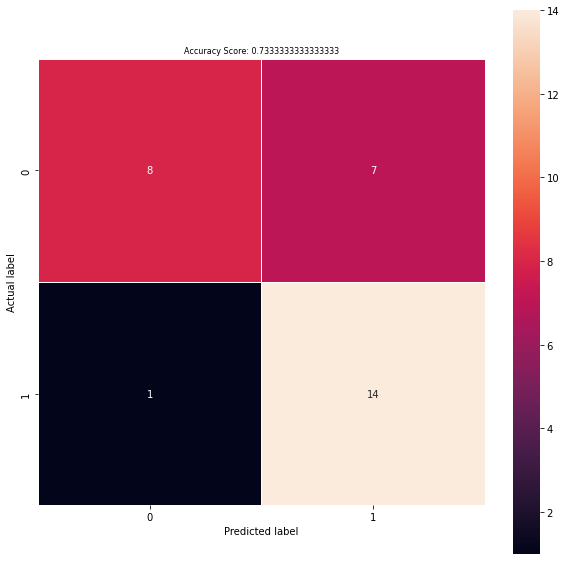

In [19]:
## Evaluate the model
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(tag_web_list[0:30], tag_classifier_list[0:30])
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 8);

### Comparison

#### classified by Johan Nilsson

Of the abstract with number 1-30 I think the following 15 abstract are related to mortality:

2,4,8,9,11,12,16,18,20,22,23,24,27,28,30,(1,6,7,17,26)

#### classified by PubMed

1,2,4,8,9,11,12,16,17,18,19,20,27,28,30

#### classified by the tfidf model

1,2,4,5,6,7,8,9,11,16,17,18,19,20,21,22,24,26,27,28,30

#### classified by the distilBERT model

1,2,4,5,6,7,8,9,11,12,16,17,19,20,22,24,26,27,28,30


26: border line
21: too short abstract
6: border line